# Worksheet 24

Name:  
UID: 

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

Epoch 1/200

3/3 [==============================] - 2s 160ms/step - loss: 0.8368 - accuracy: 0.4495 - val_loss: 0.8037 - val_accuracy: 0.5714
Epoch 2/200
3/3 [==============================] - 0s 29ms/step - loss: 0.8197 - accuracy: 0.4220 - val_loss: 0.7994 - val_accuracy: 0.5714
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 0.8274 - accuracy: 0.4128 - val_loss: 0.7954 - val_accuracy: 0.5714
Epoch 4/200
3/3 [==============================] - 0s 28ms/step - loss: 0.8315 - accuracy: 0.4128 - val_loss: 0.7923 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 26ms/step - loss: 0.8060 - accuracy: 0.4954 - val_loss: 0.7894 - val_accuracy: 0.5714
Epoch 6/200
3/3 [==============================] - 0s 27ms/step - loss: 0.8029 - accuracy: 0.5229 - val_loss: 0.7864 - val_accuracy: 0.6071
Epoch 7/200
3/3 [==============================] - 0s 28ms/step - loss: 0.8218 - accuracy: 0.4037 - val_loss: 0.7834 - val_accuracy: 0.6429
Epoch 8/200
3/3 [=

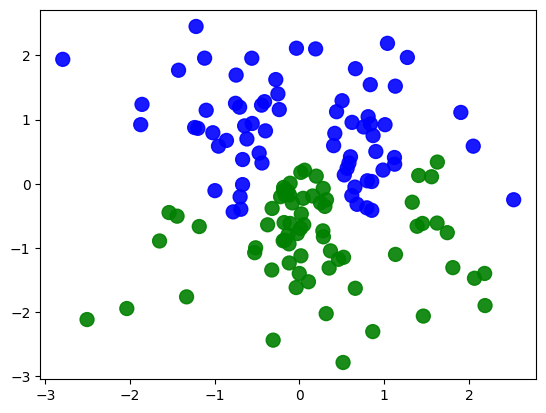

Epoch 1/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.8102
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.7737
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.7299
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.8029
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7956
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4617 - accuracy: 0.7737
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.7956
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7591
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.7810
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4663 - accuracy: 0.7664
Epoch 11/200
3/3 [===========

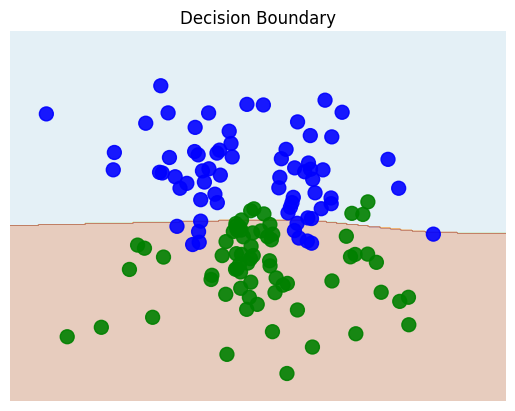

In [6]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# # The modified model
# model = keras.models.Sequential()
# model.add(layers.Dense(10, input_dim=2, activation="relu"))  # increased neurons and changed to ReLU
# model.add(layers.Dense(10, activation="relu"))  # additional hidden layer
# model.add(layers.Dense(1, activation="sigmoid"))  # output layer remains the same
# model.compile(loss="binary_crossentropy", optimizer='adam')  # changed optimizer to 'adam'

from tensorflow.keras.regularizers import l2
# The modified model with regularization
model = keras.models.Sequential()
model.add(layers.Dense(10, input_dim=2, activation="relu", kernel_regularizer=l2(0.01)))
model.add(layers.Dense(10, activation="relu", kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

X, Y = generate_curve_data(t)

history = model.fit(X, Y, batch_size=50, epochs=200, validation_split=0.2, callbacks=[early_stopping])

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()